# Aula 18/10/2023 - atividade remota


## Time Series Analysis, Regression, and Forecasting


### 1. How To Isolate Trend, Seasonality And Noise From A Time Series

In [4]:
# Decomposition of a time series into its trend, seasonal and noise components using a simple procedure based on moving averages using the following steps:
# STEP 1: Identify the length of the seasonal period
# STEP 2: Isolate the trend
# STEP 3: Isolate the seasonality+noise
# STEP 4: Isolate the seasonality
# STEP 5: Isolate the noise

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import os

In [5]:
path = 'C:/ENS410064/dados/brutos/atividade02'
files = os.listdir(path)
print(files)

['13600002_max_ano_cotas.csv', '13600002_max_ano_vazoes.csv', 'flow_13600002_RIO_BRANCO.csv', 'power_plant_output.csv', 'random_walk.csv', 'restaurant_decibel_level.csv', 'stage_13600002_RIO_BRANCO.csv']


Text(0, 0.5, 'Q (m³/s)')

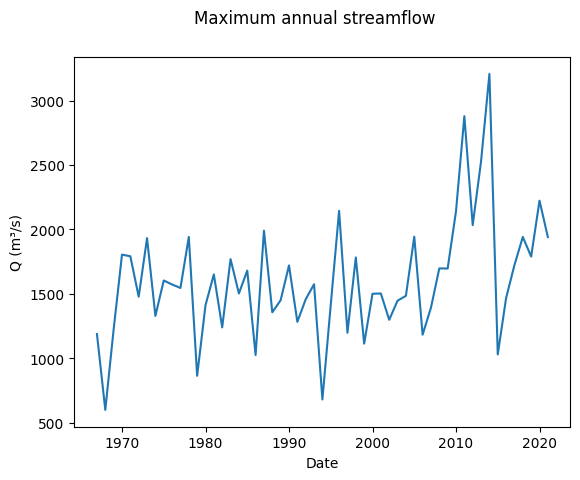

In [3]:
# read streamflow dataset
streamflow = pd.read_csv(path+'/13600002_max_ano_vazoes.csv', sep=';', header=0, parse_dates=['Data'], date_format='%y-%m-%d')
streamflow

# Ensure that 'Data' is in datetime format
streamflow['Data'] = pd.to_datetime(streamflow['Data'])

# Extract the year from the 'Data' column
streamflow['Date'] = streamflow['Data'].dt.year

fig = plt.figure()
#streamflow['Vazao'].plot()
plt.plot(streamflow['Date'], streamflow['Vazao'])

fig.suptitle('Maximum annual streamflow')
plt.xlabel('Date')
plt.ylabel('Q (m³/s)')

Text(0, 0.5, 'Level (m)')

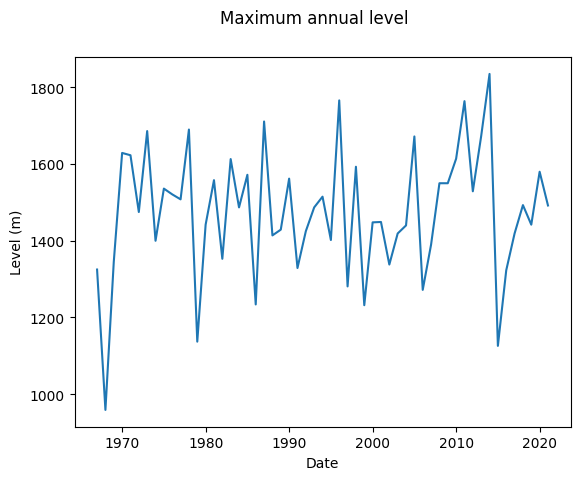

In [57]:
# read level dataset
level = pd.read_csv(path+'/13600002_max_ano_cotas.csv', sep=';', header=0, parse_dates=['Data'], date_format='%y-%m-%d')
level

# Ensure that 'Data' is in datetime format
level['Data'] = pd.to_datetime(level['Data'])

# Extract the year from the 'Data' column
level['Date'] = level['Data'].dt.year

fig = plt.figure()
#level['Cota'].plot()
plt.plot(level['Date'], level['Cota'])

fig.suptitle('Maximum annual level')
plt.xlabel('Date')
plt.ylabel('Level (m)')

In [43]:
# add a column containing a 2 x 10 centered moving average. this column will capture the trend component in the time series
streamflow['2 x 10 CMA (TREND)'] = np.nan
for i in range(5,streamflow['Vazao'].size - 5):
    streamflow['2 x 10 CMA (TREND)'][i] = streamflow['Vazao'][i - 5] * 1.0 / 20 +\
                (streamflow['Vazao'][i - 4] + streamflow['Vazao'][i - 3] +\
                streamflow['Vazao'][i - 2] + streamflow['Vazao'][i - 1] +\
                streamflow['Vazao'][i] + streamflow['Vazao'][i + 1] +\
                streamflow['Vazao'][i + 2] + streamflow['Vazao'][i + 3] +\
                streamflow['Vazao'][i + 4]) * 1.0 / 10 +\
                streamflow['Vazao'][i + 5] * 1.0 / 20

# streamflow.rolling().mean()  # media movel
print(streamflow)

         Data  Vazao  Date  2 x 10 CMA (TREND)
0  1967-01-10   1188  1967                 NaN
1  1968-01-10    599  1968                 NaN
2  1969-01-10   1225  1969                 NaN
3  1970-01-10   1805  1970                 NaN
4  1971-01-10   1792  1971                 NaN
5  1972-01-10   1478  1972             1470.50
6  1973-01-10   1933  1973             1555.55
7  1974-01-10   1329  1974             1604.65
8  1975-01-10   1604  1975             1566.95
9  1976-01-10   1573  1976             1540.25
10 1977-01-10   1546  1977             1521.30
11 1978-01-10   1942  1978             1501.25
12 1979-01-10    864  1979             1501.80
13 1980-01-10   1412  1980             1514.35
14 1981-01-10   1651  1981             1490.80
15 1982-01-10   1240  1982             1485.65
16 1983-01-10   1770  1983             1478.65
17 1984-01-10   1503  1984             1478.75
18 1985-01-10   1681  1985             1523.55
19 1986-01-10   1025  1986             1520.60
20 1987-01-10

C:\Users\Usuário\AppData\Local\Temp\ipykernel_6756\158984059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streamflow['2 x 10 CMA (TREND)'][i] = streamflow['Vazao'][i - 5] * 1.0 / 20 +\
C:\Users\Usuário\AppData\Local\Temp\ipykernel_6756\158984059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streamflow['2 x 10 CMA (TREND)'][i] = streamflow['Vazao'][i - 5] * 1.0 / 20 +\
C:\Users\Usuário\AppData\Local\Temp\ipykernel_6756\158984059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Text(0, 0.5, 'Q (m³/s)')

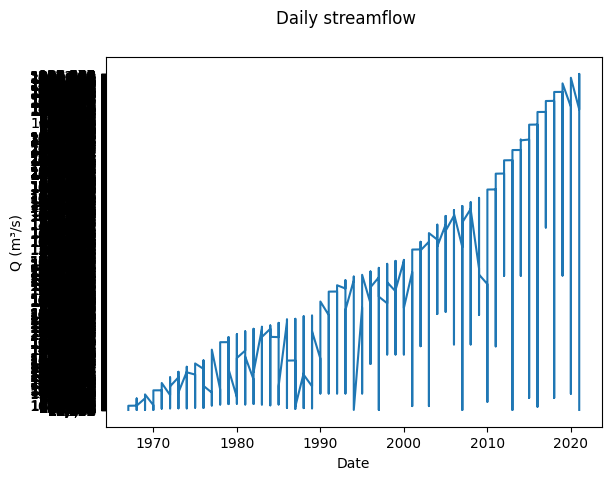

In [7]:
# read daily streamflow dataset
daily_streamflow = pd.read_csv(path+'/flow_13600002_RIO_BRANCO.csv', sep=';', header=0, parse_dates=['Data'], date_format='%y-%m-%d')
daily_streamflow

# Ensure that 'Data' is in datetime format
daily_streamflow['Data'] = pd.to_datetime(daily_streamflow['Data'])

# Extract the year from the 'Data' column
daily_streamflow['Date'] = daily_streamflow['Data'].dt.year

daily_streamflow['Vazao'] = daily_streamflow['Vazao'].astype(str)

fig = plt.figure()
plt.plot(daily_streamflow['Date'], daily_streamflow['Vazao'])
fig.suptitle('Daily streamflow')
plt.xlabel('Date')
plt.ylabel('Q (m³/s)')

In [8]:
daily_streamflow

,Data,NivelConsistencia,Vazao,Date
0,1967-08-01,2,nan,1967
1,1967-08-02,2,nan,1967
2,1967-08-03,2,nan,1967
3,1967-08-04,2,nan,1967
4,1967-08-05,2,nan,1967
...,...,...,...,...
19212,2021-06-27,1,"76,895",2021
19213,2021-06-28,1,"77,153",2021
19214,2021-06-29,1,"80,536",2021
19215,2021-06-30,1,"86,403",2021


In [10]:
# add a column containing a 2 x 10 centered moving average. this column will capture the trend component in the time series
daily_streamflow['2 x 10 CMA (TREND)'] = np.nan
for i in range(5,daily_streamflow['Vazao'].size - 5):
    daily_streamflow['2 x 10 CMA (TREND)'][i] = daily_streamflow['Vazao'][i - 5] * 1.0 / 20 +\
                (daily_streamflow['Vazao'][i - 4] + daily_streamflow['Vazao'][i - 3] +\
                daily_streamflow['Vazao'][i - 2] + daily_streamflow['Vazao'][i - 1] +\
                daily_streamflow['Vazao'][i] + daily_streamflow['Vazao'][i + 1] +\
                daily_streamflow['Vazao'][i + 2] + daily_streamflow['Vazao'][i + 3] +\
                daily_streamflow['Vazao'][i + 4]) * 1.0 / 10 +\
                daily_streamflow['Vazao'][i + 5] * 1.0 / 20
print(daily_streamflow)

TypeError: can't multiply sequence by non-int of type 'float'

Text(0, 0.5, 'Level (m)')

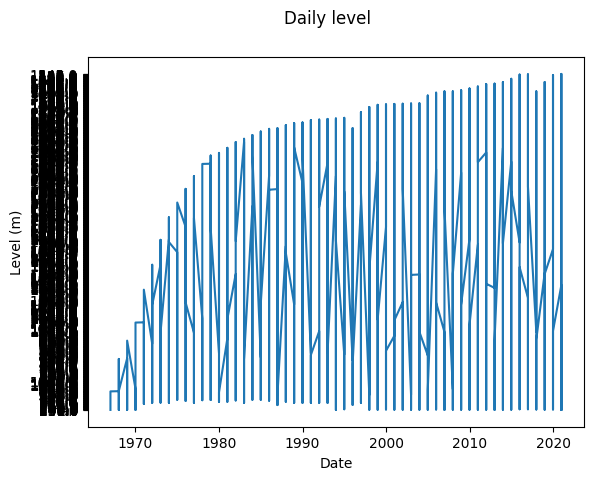

In [84]:
# read daily level dataset
daily_level = pd.read_csv(path+'/stage_13600002_RIO_BRANCO.csv', sep=';', header=0, parse_dates=['Data'], date_format='%y-%m-%d')
daily_level

# Ensure that 'Data' is in datetime format
daily_level['Data'] = pd.to_datetime(daily_level['Data'])

# Extract the year from the 'Data' column
daily_level['Date'] = daily_level['Data'].dt.year

daily_level['Cota'] = daily_level['Cota'].astype(str)

fig = plt.figure()
plt.plot(daily_level['Date'], daily_level['Cota'])
fig.suptitle('Daily level')
plt.xlabel('Date')
plt.ylabel('Level (m)')

### 2. The White Noise Model

#### How to detect white noise in a time series data set test

###### We’ll look at 3 tests to determine whether your time series is in reality, just white noise: auto-correlation plots, the Box-Pierce test, the Ljung-Box test

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read dataset
df = pd.read_csv(path+'/restaurant_decibel_level.csv', header=0, index_col=[0])
df.head(10)  # Let’s print the top 10 rows

,Decibel
TimeIndex,
0,55.931323
40,57.779260
80,62.956952
140,65.158100
180,60.325242
220,45.411725
262,55.958807
300,62.021807
340,62.222563


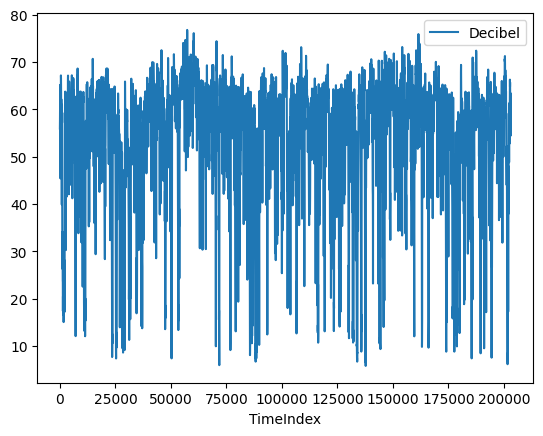

In [13]:
# Let’s plot all values in the series
df['Decibel'].plot()
plt.legend()

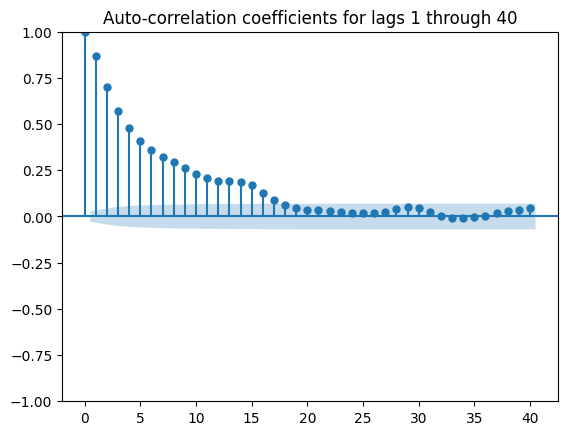

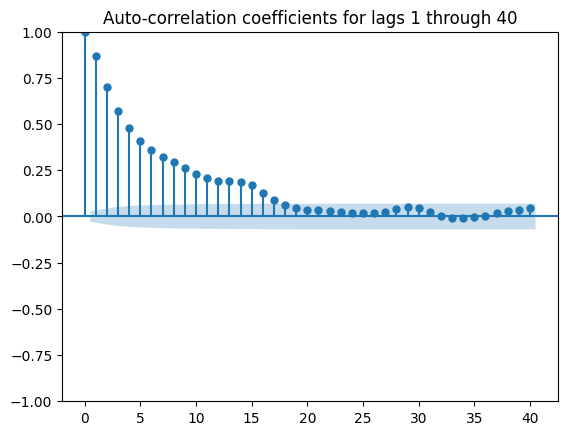

In [65]:
# Let’s fetch and plot the auto-correlation coefficients for the first 40 lags
import statsmodels.graphics.tsaplots as tsa

tsa.plot_acf(df['Decibel'], lags=40, alpha=0.05, title='Auto-correlation coefficients for lags 1 through 40')

In [15]:
# The Ljung-Box test for white noise detection
# We will test upto 40 lags and we’ll ask the test to also run the Box-Pierce test

import statsmodels.stats.diagnostic as diag
 
diag.acorr_ljungbox(df['Decibel'], lags=[40], boxpierce=True, model_df=0, period=None, return_df=None)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,13172.805545,0.0,13156.420746,0.0


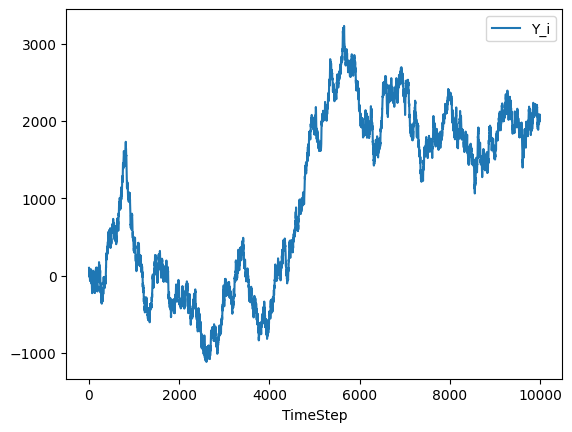

In [67]:
# Detecting Random Walks
df_random = pd.read_csv(path+'/random_walk.csv', header=0, index_col=[0])
 
# Let’s plot it to see how the data looks like
df_random.plot()
plt.show()

In [68]:
# Ljung-Box white noise test on this data
diag.acorr_ljungbox(df_random['Y_i'], lags=[40], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,393833.912525,0.0,392952.076757,0.0


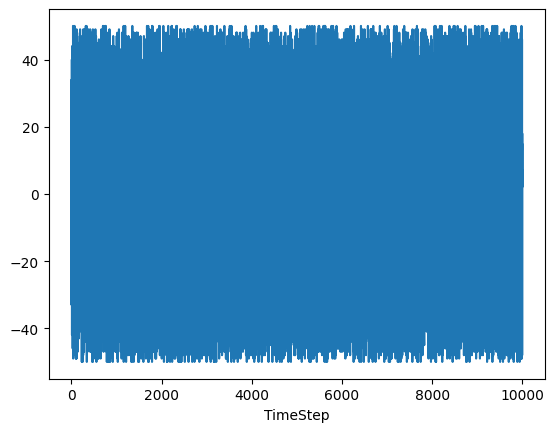

In [69]:
#  Creating a new data set with Y = Y_i — Y_(i-1)
diff_Y_i = df_random['Y_i'].diff()

# drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()
 
# Let’s plot the diff-ed data set
diff_Y_i.plot()
plt.show()

In [70]:
#  The Ljung-Box test on the differenced data set
diag.acorr_ljungbox(diff_Y_i, lags=[40], boxpierce=True)


,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,32.934054,0.778224,32.850518,0.781375


### 3. The Assumptions Of Linear Regression, And How To Test Them

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from patsy import dmatrices, dmatrix, demo_data

In [19]:
df = pd.read_csv(path+'/power_plant_output.csv', header=0)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


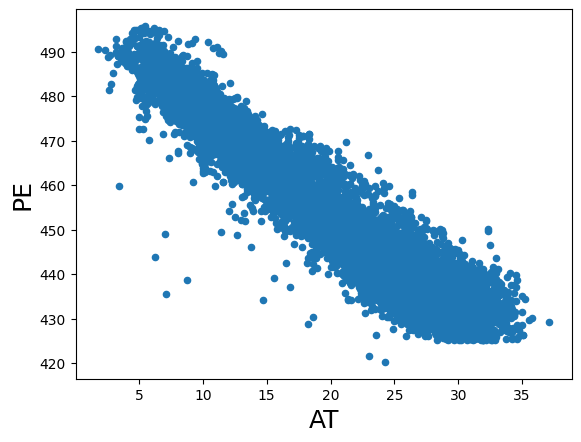

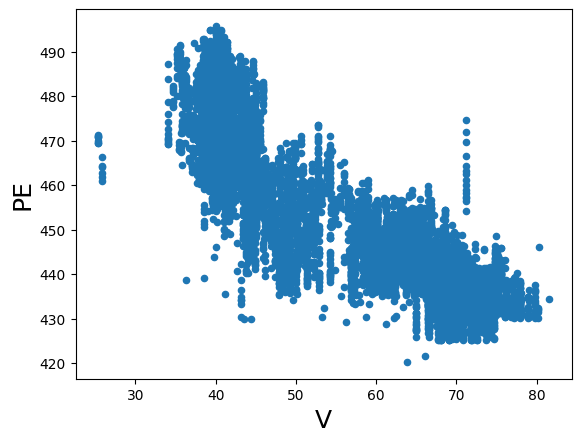

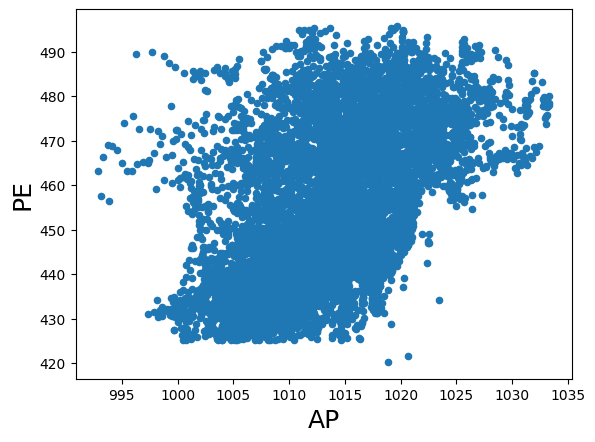

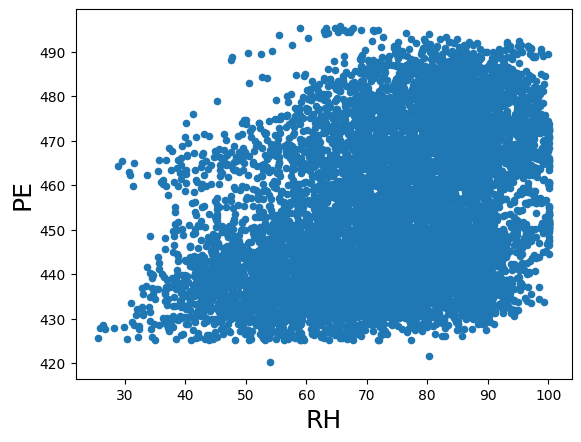

In [38]:
# Assumption 1: Linear functional form

# Plot the scatter plots of each explanatory variable against the response variable PE
# The response variable y is PE of the power plant in MW.

df.plot.scatter(x='AT', y='PE')
plt.xlabel('AT', fontsize=18)
plt.ylabel('PE', fontsize=18)
plt.show()
 
df.plot.scatter(x='V', y='PE')
plt.xlabel('V', fontsize=18)
plt.ylabel('PE', fontsize=18)
plt.show()
 
df.plot.scatter(x='AP', y='PE')
plt.xlabel('AP', fontsize=18)
plt.ylabel('PE', fontsize=18)
plt.show()
 
df.plot.scatter(x='RH', y='PE')
plt.xlabel('RH', fontsize=18)
plt.ylabel('PE', fontsize=18)
plt.show()

In [40]:
# Let’s also print out the Pearson’s ‘r’
df.corr()['PE']

AT   -0.948128
V    -0.869780
AP    0.518429
RH    0.389794
PE    1.000000
Name: PE, dtype: float64

In [41]:
# Assumption 2: i.i.d. residual errors

#from sklearn import linear_model
from statsmodels.regression import linear_model

# Fit a linear regression model to the Power Plant data and inspect the residual errors of regression.
model_expr = 'PE ~ AT + V + AP + RH' # EP is the response variable

# Use patsy to carve out the y and X matrices as follows
y, X = dmatrices(model_expr, df, return_type='dataframe')

mask = np.random.rand(len(X)) < 0.8
X_train = X[mask]
y_train = y[mask]
X_test = X[~mask]
y_test = y[~mask]

olsr_results = linear_model.OLS(y_train, X_train).fit()  # doesn't recognize linear_model.OLS
print('Training completed')
print(olsr_results.summary())

# Next, let’s get the predictions of the model on test data set and get its predictions:
olsr_predictions = olsr_results.get_prediction(X_test)
prediction_summary_frame = olsr_predictions.summary_frame()
print(prediction_summary_frame)

Training completed
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.481e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:15:16   Log-Likelihood:                -22625.
No. Observations:                7693   AIC:                         4.526e+04
Df Residuals:                    7688   BIC:                         4.529e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    455.7844     10.908 

In [32]:
# Another attempt at Assumption 2

from sklearn.linear_model import LinearRegression

mask = np.random.rand(len(X)) < 0.8
X_train = X[mask]
y_train = y[mask]
X_test = X[~mask]
y_test = y[~mask]

# Crie e ajuste um modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Realize previsões
y_pred = regressor.predict(X_test)

# Visualize os resultados
print('Training completed')
print(f'R² Score: {regressor.score(X_test, y_test)}')
regressor.summary()

Training completed
R² Score: 0.9241570478828609


In [44]:
resid = y_test['PE'] - prediction_summary_frame['mean']
resid

0      -4.034913
2       5.035807
5       1.302634
8       3.961773
16      3.666222
          ...   
9547    6.000475
9549   -0.748288
9550    7.444077
9551   -2.530624
9554   -2.544064
Length: 1875, dtype: float64

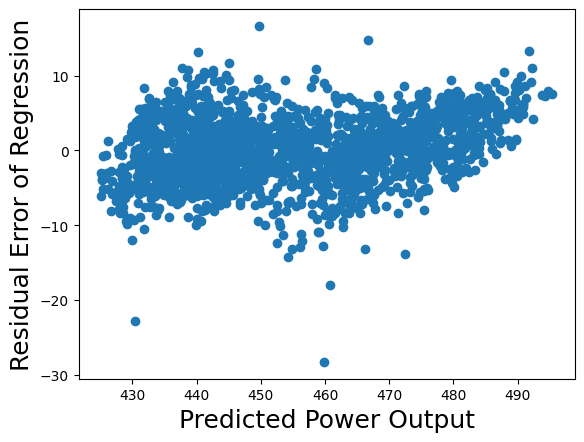

In [45]:
# Finally, let’s plot resid against the predicted value y_pred=prediction_summary_frame[‘mean’]
plt.xlabel('Predicted Power Output', fontsize=18)
plt.ylabel('Residual Error of Regression', fontsize=18)
plt.scatter(y_test['PE'], resid)
plt.show()

In [46]:
# Assumption 3: Residual errors should be normally distributed
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
 
name = ['Jarque-Bera test', 'Chi-squared(2) p-value', 'Skewness', 'Kurtosis']
 
# Run the Jarque-Bera test for Normality on the residuals vector
test = sms.jarque_bera(resid)
 
# Print out the test results. This will also print the Skewness and Kurtosis of the resid vector
lzip(name, test)

[('Jarque-Bera test', 77.72412262059775),
 ('Chi-squared(2) p-value', 1.3256266229147527e-17),
 ('Skewness', -0.15499574961363421),
 ('Kurtosis', 3.948036940182439)]

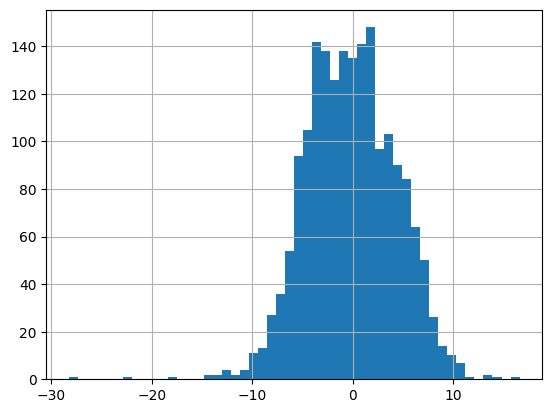

In [47]:
# Let’s plot the frequency distribution of the residual errors:
resid.hist(bins=50)
plt.show()

In [48]:
# Assumption 4: Residual errors should be homoscedastic
# Testing for heteroscedastic variance
from statsmodels.stats.diagnostic import het_white
 
keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
 
# Run the White test
results = het_white(resid, X_test)
 
# Print the results
lzip(keys, results)

[('Lagrange Multiplier statistic:', 75.65534080041999),
 ("LM test's p-value:", 1.7938549032082987e-10),
 ('F-statistic:', 5.586118462206381),
 ("F-test's p-value:", 1.0803974299349436e-10)]